Dataset Head:


,Unnamed: 0,TransactionID,Amount,POSNo,CustomerID,Location,BusinessSector,TimeStamp,Time,Hour,Minute,Second,NightTransaction,Date,StandardDate,Year,Month,DayOfMonth
0,11127630,11127631,91,2135339228,3161689740,14924,41678,5/18/2023 8:26,8:26:46,8,26,46,0,20230518,5/18/2023,2023,5,18
1,15945317,15945318,65,2111946871,3130500384,7748,41821,5/25/2023 12:15,12:15:19,12,15,19,0,20230525,5/25/2023,2023,5,25
2,9975588,9975589,520,2116632730,3136734711,7943,43667,5/16/2023 17:16,17:16:50,17,16,50,0,20230516,5/16/2023,2023,5,16
3,4466900,4466901,130,2150299003,3180955239,7605,40573,5/10/2023 19:59,19:59:02,19,59,2,0,20230510,5/10/2023,2023,5,10
4,6681611,6681612,2080,2144870313,3173854827,7618,40950,5/11/2023 10:58,10:58:22,10,58,22,0,20230511,5/11/2023,2023,5,11


Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estima

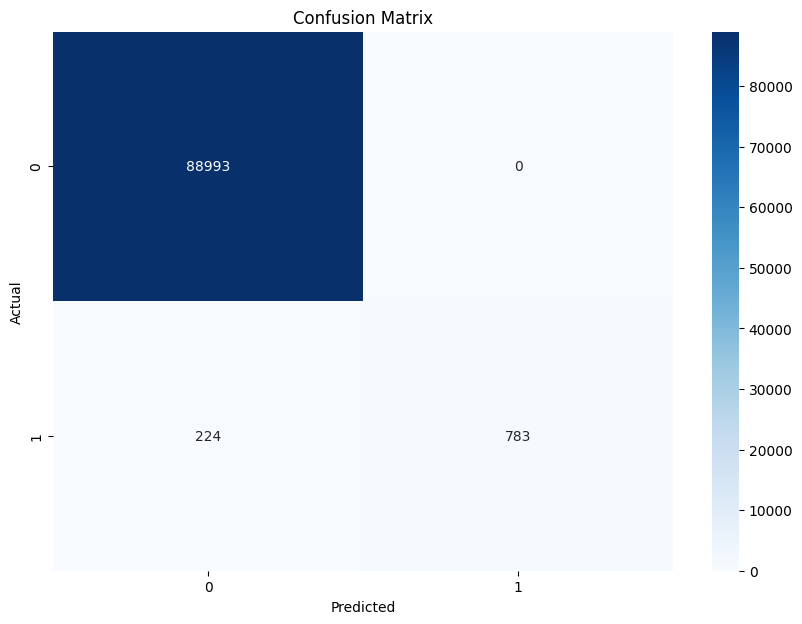

In [3]:
#KNN 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFECV
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Transactions_red.csv"  # Assuming this is the correct file name
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
print("Dataset Head:")
display(df.head())

# Preprocessing
# Drop the unnamed column as it is not needed
df.drop(columns=['Unnamed: 0'], inplace=True)

# Handle missing or malformed data
# Removing rows with ### in 'TimeStamp' and 'StandardDate' columns
df = df[~df['TimeStamp'].str.contains('###', na=False)]
df = df[~df['StandardDate'].str.contains('###', na=False)]

# Convert 'Time' to three separate columns: Hour, Minute, Second
df[['Hour', 'Minute', 'Second']] = df['Time'].str.split(':', expand=True).astype(int)

# Drop the original 'Time' column as we have extracted useful information
df.drop(columns=['Time'], inplace=True)

# Convert 'Date' to datetime format and extract Year, Month, Day
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfMonth'] = df['Date'].dt.day

# Drop rows with NaT values resulted from datetime conversion
df.dropna(subset=['Date'], inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Location', 'BusinessSector']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Select features and target variable
features = ['Amount', 'POSNo', 'CustomerID', 'Location', 'BusinessSector', 'Hour', 'Minute', 'Second', 'Year', 'Month', 'DayOfMonth']
X = df[features]
y = df['NightTransaction']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the RandomForestClassifier for feature selection
rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Initialize Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(estimator=rf, step=1, cv=3, scoring='accuracy', verbose=2)

# Fit RFECV to the training data
rfecv.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfecv.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

# Train the KNN model with selected features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[:, rfecv.support_], y_train)

# Predict on the test set
y_pred = knn.predict(X_test[:, rfecv.support_])

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Dataset Head:


,Unnamed: 0,TransactionID,Amount,POSNo,CustomerID,Location,BusinessSector,TimeStamp,Time,Hour,Minute,Second,NightTransaction,Date,StandardDate,Year,Month,DayOfMonth
0,11127630,11127631,91,2135339228,3161689740,14924,41678,5/18/2023 8:26,8:26:46,8,26,46,0,20230518,5/18/2023,2023,5,18
1,15945317,15945318,65,2111946871,3130500384,7748,41821,5/25/2023 12:15,12:15:19,12,15,19,0,20230525,5/25/2023,2023,5,25
2,9975588,9975589,520,2116632730,3136734711,7943,43667,5/16/2023 17:16,17:16:50,17,16,50,0,20230516,5/16/2023,2023,5,16
3,4466900,4466901,130,2150299003,3180955239,7605,40573,5/10/2023 19:59,19:59:02,19,59,2,0,20230510,5/10/2023,2023,5,10
4,6681611,6681612,2080,2144870313,3173854827,7618,40950,5/11/2023 10:58,10:58:22,10,58,22,0,20230511,5/11/2023,2023,5,11


C:\Users\Leon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9859 - loss: 0.0690 - val_accuracy: 0.9886 - val_loss: 0.0393
Epoch 2/50
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9882 - loss: 0.0387 - val_accuracy: 0.9886 - val_loss: 0.0349
Epoch 3/50
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9888 - loss: 0.0345 - val_accuracy: 0.9886 - val_loss: 0.0332
Epoch 4/50
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9889 - loss: 0.0332 - val_accuracy: 0.9888 - val_loss: 0.0339
Epoch 5/50
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9895 - loss: 0.0315 - val_accuracy: 0.9906 - val_loss: 0.0314
Epoch 6/50
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9905 - loss: 0.0317 - val_accuracy: 0.9899 - val_loss: 0.0318
Epoch 7/50
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9908 - loss: 0.0311 - val_accuracy: 0.9914 - val_loss: 0.0307
Epoch 8/50
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9910 - loss: 0.0310 -

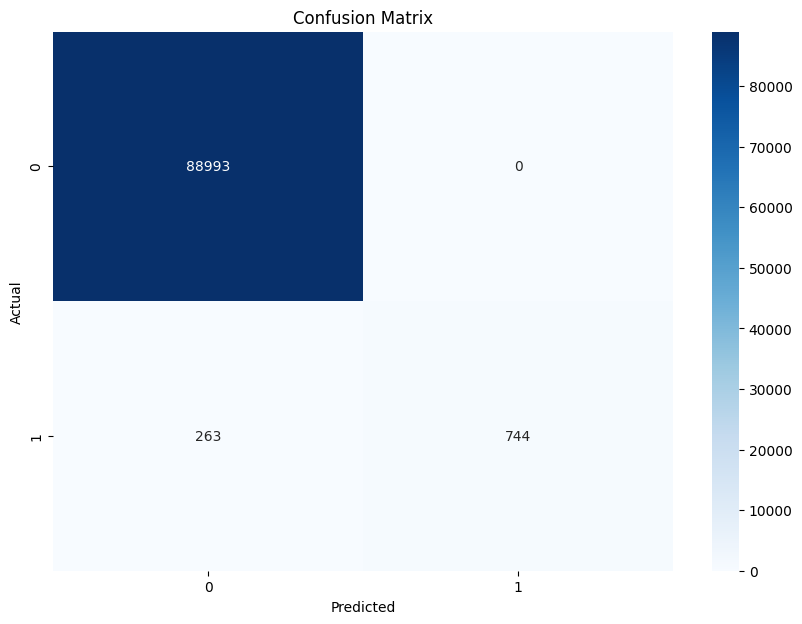

In [4]:
# Deep Feed forward neural Network also known as MLP
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Transactions_red.csv"  # Assuming this is the correct file name
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
print("Dataset Head:")
display(df.head())

# Preprocessing
# Drop the unnamed column as it is not needed
df.drop(columns=['Unnamed: 0'], inplace=True)

# Handle missing or malformed data
# Removing rows with ### in 'TimeStamp' and 'StandardDate' columns
df = df[~df['TimeStamp'].str.contains('###', na=False)]
df = df[~df['StandardDate'].str.contains('###', na=False)]

# Convert 'Time' to three separate columns: Hour, Minute, Second
df[['Hour', 'Minute', 'Second']] = df['Time'].str.split(':', expand=True).astype(int)

# Drop the original 'Time' column as we have extracted useful information
df.drop(columns=['Time'], inplace=True)

# Convert 'Date' to datetime format and extract Year, Month, Day
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfMonth'] = df['Date'].dt.day

# Drop rows with NaT values resulted from datetime conversion
df.dropna(subset=['Date'], inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Location', 'BusinessSector']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Select features and target variable
features = ['Amount', 'POSNo', 'CustomerID', 'Location', 'BusinessSector', 'Hour', 'Minute', 'Second', 'Year', 'Month', 'DayOfMonth']
X = df[features]
y = df['NightTransaction']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the DNN model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Evaluate the model
conf_matrix = confusion_matrix(y_true, y_pred_classes)
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)

# Print the evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# To display the confusion matrix more clearly
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

 


In [11]:
pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


Dataset Head:


,Unnamed: 0,TransactionID,Amount,POSNo,CustomerID,Location,BusinessSector,TimeStamp,Time,Hour,Minute,Second,NightTransaction,Date,StandardDate,Year,Month,DayOfMonth
0,11127630,11127631,91,2135339228,3161689740,14924,41678,5/18/2023 8:26,8:26:46,8,26,46,0,20230518,5/18/2023,2023,5,18
1,15945317,15945318,65,2111946871,3130500384,7748,41821,5/25/2023 12:15,12:15:19,12,15,19,0,20230525,5/25/2023,2023,5,25
2,9975588,9975589,520,2116632730,3136734711,7943,43667,5/16/2023 17:16,17:16:50,17,16,50,0,20230516,5/16/2023,2023,5,16
3,4466900,4466901,130,2150299003,3180955239,7605,40573,5/10/2023 19:59,19:59:02,19,59,2,0,20230510,5/10/2023,2023,5,10
4,6681611,6681612,2080,2144870313,3173854827,7618,40950,5/11/2023 10:58,10:58:22,10,58,22,0,20230511,5/11/2023,2023,5,11


Confusion Matrix:
[[54615  4701]
 [  136   548]]
Accuracy: 0.92
Precision: 0.10
Recall: 0.80
F1 Score: 0.18


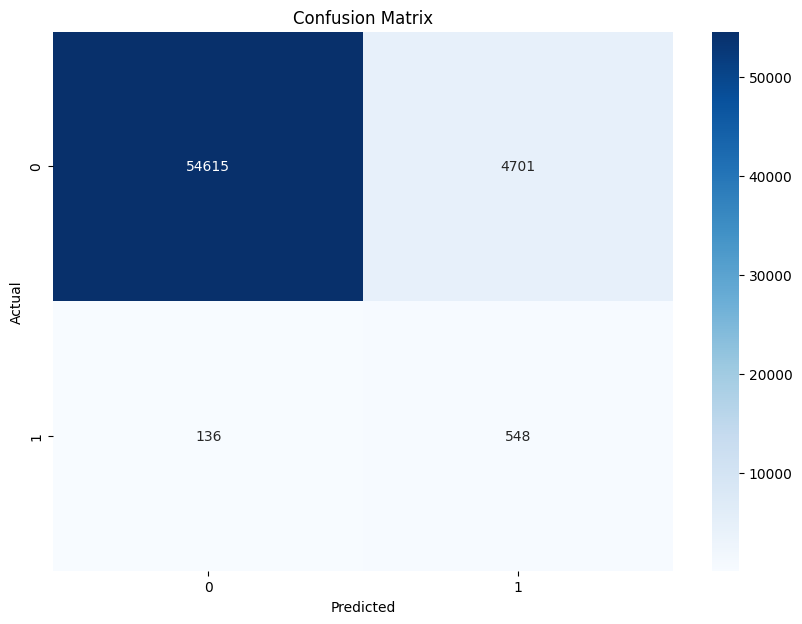

In [4]:
#SVC Support Vector Machine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Transactions_red.csv"  # Assuming this is the correct file name
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
print("Dataset Head:")
display(df.head())

# Preprocessing
# Drop the unnamed column as it is not needed
df.drop(columns=['Unnamed: 0'], inplace=True)

# Handle missing or malformed data
# Removing rows with ### in 'TimeStamp' and 'StandardDate' columns
df = df[~df['TimeStamp'].str.contains('###', na=False)]
df = df[~df['StandardDate'].str.contains('###', na=False)]

# Convert 'Time' to three separate columns: Hour, Minute, Second
df[['Hour', 'Minute', 'Second']] = df['Time'].str.split(':', expand=True).astype(int)

# Drop the original 'Time' column as we have extracted useful information
df.drop(columns=['Time'], inplace=True)

# Convert 'Date' to datetime format and extract Year, Month, Day
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfMonth'] = df['Date'].dt.day

# Drop rows with NaT values resulted from datetime conversion
df.dropna(subset=['Date'], inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Location', 'BusinessSector']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Select features and target variable
features = ['Amount', 'POSNo', 'CustomerID', 'Location', 'BusinessSector', 'Hour', 'Minute', 'Second', 'Year', 'Month', 'DayOfMonth']
X = df[features]
y = df['NightTransaction']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model with class weight balanced
svm = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Dataset Head:


,Unnamed: 0,TransactionID,Amount,POSNo,CustomerID,Location,BusinessSector,TimeStamp,Time,Hour,Minute,Second,NightTransaction,Date,StandardDate,Year,Month,DayOfMonth
0,11127630,11127631,91,2135339228,3161689740,14924,41678,5/18/2023 8:26,8:26:46,8,26,46,0,20230518,5/18/2023,2023,5,18
1,15945317,15945318,65,2111946871,3130500384,7748,41821,5/25/2023 12:15,12:15:19,12,15,19,0,20230525,5/25/2023,2023,5,25
2,9975588,9975589,520,2116632730,3136734711,7943,43667,5/16/2023 17:16,17:16:50,17,16,50,0,20230516,5/16/2023,2023,5,16
3,4466900,4466901,130,2150299003,3180955239,7605,40573,5/10/2023 19:59,19:59:02,19,59,2,0,20230510,5/10/2023,2023,5,10
4,6681611,6681612,2080,2144870313,3173854827,7618,40950,5/11/2023 10:58,10:58:22,10,58,22,0,20230511,5/11/2023,2023,5,11


Confusion Matrix:
[[58955   361]
 [  146   538]]
Accuracy: 0.99
Precision: 0.60
Recall: 0.79
F1 Score: 0.68


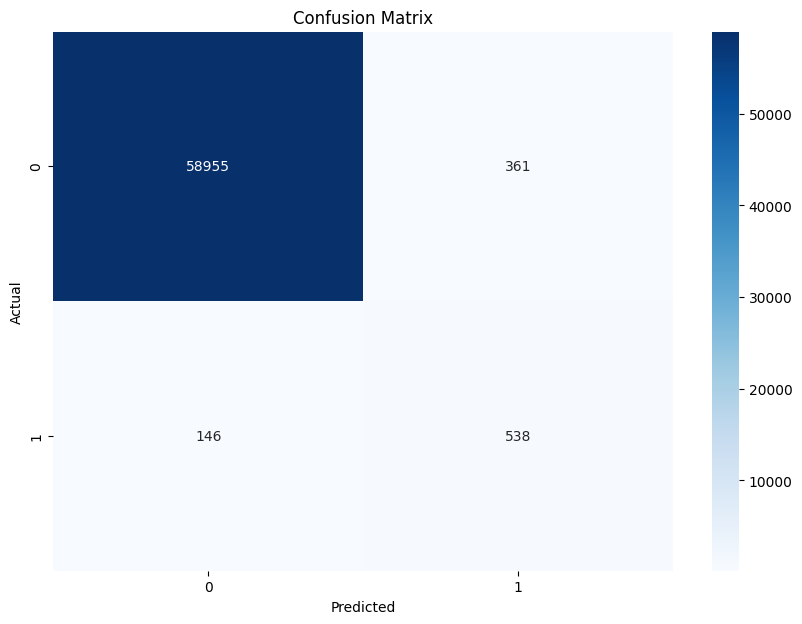

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Transactions_red.csv"  # Assuming this is the correct file name
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
print("Dataset Head:")
display(df.head())

# Preprocessing
# Drop the unnamed column as it is not needed
df.drop(columns=['Unnamed: 0'], inplace=True)

# Handle missing or malformed data
# Removing rows with ### in 'TimeStamp' and 'StandardDate' columns
df = df[~df['TimeStamp'].str.contains('###', na=False)]
df = df[~df['StandardDate'].str.contains('###', na=False)]

# Convert 'Time' to three separate columns: Hour, Minute, Second
df[['Hour', 'Minute', 'Second']] = df['Time'].str.split(':', expand=True).astype(int)

# Drop the original 'Time' column as we have extracted useful information
df.drop(columns=['Time'], inplace=True)

# Convert 'Date' to datetime format and extract Year, Month, Day
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfMonth'] = df['Date'].dt.day

# Drop rows with NaT values resulted from datetime conversion
df.dropna(subset=['Date'], inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Location', 'BusinessSector']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Select features and target variable
features = ['Amount', 'POSNo', 'CustomerID', 'Location', 'BusinessSector', 'Hour', 'Minute', 'Second', 'Year', 'Month', 'DayOfMonth']
X = df[features]
y = df['NightTransaction']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = dt.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [4]:
!pip install tensorflow-addons


ERROR: Could not find a version that satisfies the requirement tensorflow-addons (from versions: none)
ERROR: No matching distribution found for tensorflow-addons


Dataset Head:


,Unnamed: 0,TransactionID,Amount,POSNo,CustomerID,Location,BusinessSector,TimeStamp,Time,Hour,Minute,Second,NightTransaction,Date,StandardDate,Year,Month,DayOfMonth
0,11127630,11127631,91,2135339228,3161689740,14924,41678,5/18/2023 8:26,8:26:46,8,26,46,0,20230518,5/18/2023,2023,5,18
1,15945317,15945318,65,2111946871,3130500384,7748,41821,5/25/2023 12:15,12:15:19,12,15,19,0,20230525,5/25/2023,2023,5,25
2,9975588,9975589,520,2116632730,3136734711,7943,43667,5/16/2023 17:16,17:16:50,17,16,50,0,20230516,5/16/2023,2023,5,16
3,4466900,4466901,130,2150299003,3180955239,7605,40573,5/10/2023 19:59,19:59:02,19,59,2,0,20230510,5/10/2023,2023,5,10
4,6681611,6681612,2080,2144870313,3173854827,7618,40950,5/11/2023 10:58,10:58:22,10,58,22,0,20230511,5/11/2023,2023,5,11


C:\Users\Leon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Confusion Matrix:
[[59249    67]
 [  167   517]]
Accuracy: 1.00
Precision: 0.89
Recall: 0.76
F1 Score: 0.82


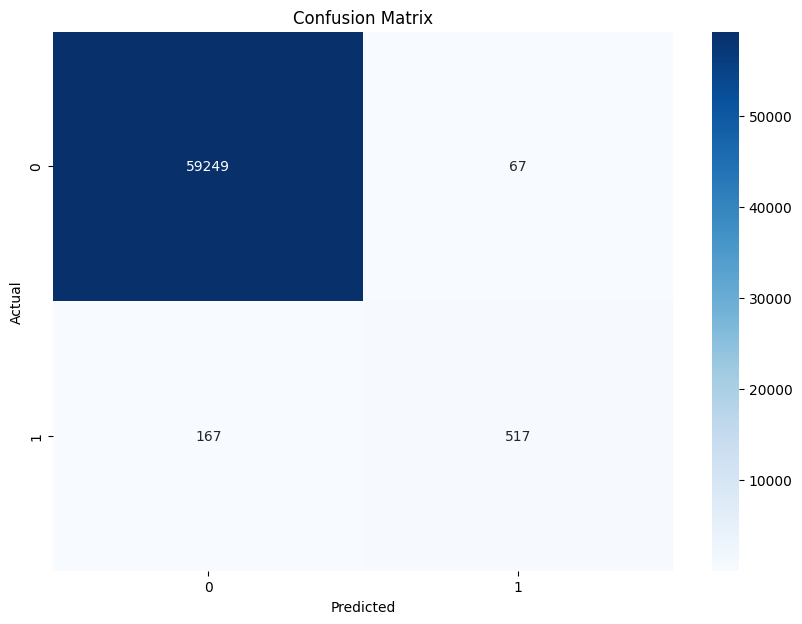

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the dataset
file_path = "Transactions_red.csv"  # Assuming this is the correct file name
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
print("Dataset Head:")
display(df.head())

# Preprocessing
# Drop the unnamed column as it is not needed
df.drop(columns=['Unnamed: 0'], inplace=True)

# Handle missing or malformed data
# Removing rows with ### in 'TimeStamp' and 'StandardDate' columns
df = df[~df['TimeStamp'].str.contains('###', na=False)]
df = df[~df['StandardDate'].str.contains('###', na=False)]

# Convert 'Time' to three separate columns: Hour, Minute, Second
df[['Hour', 'Minute', 'Second']] = df['Time'].str.split(':', expand=True).astype(int)

# Drop the original 'Time' column as we have extracted useful information
df.drop(columns=['Time'], inplace=True)

# Convert 'Date' to datetime format and extract Year, Month, Day
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfMonth'] = df['Date'].dt.day

# Drop rows with NaT values resulted from datetime conversion
df.dropna(subset=['Date'], inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Location', 'BusinessSector']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Select features and target variable
features = ['Amount', 'POSNo', 'CustomerID', 'Location', 'BusinessSector', 'Hour', 'Minute', 'Second', 'Year', 'Month', 'DayOfMonth']
X = df[features]
y = df['NightTransaction']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the Deep Feed model
def create_deep_feed_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train the Deep Feed model
dnn_model = create_deep_feed_model()
dnn_model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, verbose=0)

# Define the Voting Classifier
ensemble_model = VotingClassifier(estimators=[
    ('knn', knn),
    ('decision_tree', dt),
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
